In [1]:
from IPython import display
import seaborn as sns
from runco import config, sc
import datetime
import matplotlib.pyplot as plt
import numpy
from IPython import display
import time
sns.set_context('talk')
sns.set_style('whitegrid')

In [2]:
conf = config.Config()
slowcon = sc.ConfiguredSlowControls(conf.data['slowcontrols'])
ch = slowcon.channel_id_by_name['uB_Cryo_IFIX_1_0/LT122_Ar']
form = lambda x : x.strftime("%Y-%m-%d %H:%M:%S")

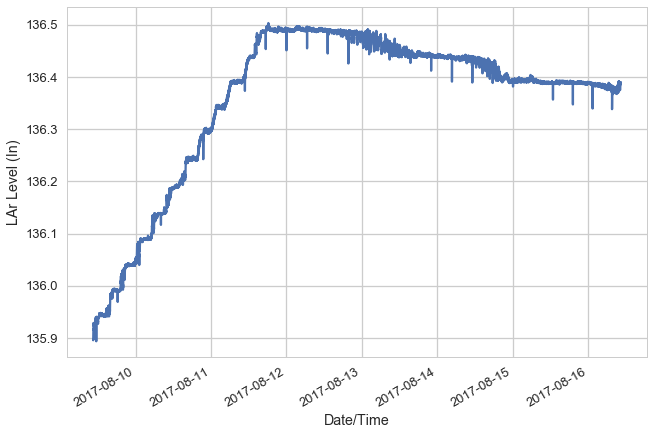

KeyboardInterrupt: 

In [3]:
while True:
    now = datetime.datetime.now()
    one_week_ago = now - datetime.timedelta(days=7)
    slowcon.query_timebinned_data(ch,1, form(one_week_ago), form(now))
    result = slowcon.cur.fetchall()
    x = [datetime.datetime.fromtimestamp(i[1])+datetime.timedelta(hours=5) for i in result]
    y = [i[2] for i in result]
    ax = plt.figure()
    plt.plot(x,y)
    plt.xlabel('Date/Time')
    plt.ylabel('LAr Level (In)')
    ax.autofmt_xdate()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(60.0)